# Descriptive analysis of data

Any good data analysis includes a descriptive examination of the data. This is usually done more at the beginning of an analysis to get a first impression about the characteristic values of the data and potential correlations. Descriptive analysis includes the interpretation of the distribution of individual characteristics and also their correlations. Suitable for this field of application are quantitative key figures from descriptive statistics and graphical representations. In this chapter we want to get a short overview of common ratios and graphs and discuss which conclusions can be drawn from them. 

## Data collection and data collection

Every data analysis is preceded by the collection of data. The goal of the analysis is to identify relations that are as generally valid as possible. For example, we might be interested in what factors influence the rental price of rental housing in Germany. The relevant unit of our example would be apartments. If we were able to collect data on all apartments, we would have an overview of the population. In this example, this would obviously require a lot of effort or would even be impossible if some of the property owners were not willing to share the data with us. Furthermore, the question arises, which characteristics should be measured besides the rental price, which potentially have an influence on it. 

The only remaining solution is to draw a sample of units (in this case apartments) and to query as many meaningful characteristic values per unit as possible. If we already obtain the sample from third parties, we usually have to perform the analysis with what is accessible and decide at a later stage whether we consider the different characteristics to be sufficient for the knowledge gain of the ananlysis.

A sample should be representative and random, but not arbitrary. In most cases, it makes the most sense if each unit is drawn with the same probability of being sampled. Without going into more detail about the statistical background, it can be stated that the findings from the analyses of the sample only allow conclusions to be drawn about general relationships if the sample roughly reflects the relationships of the data in the population. Nevertheless, slight differences in the results of the sample are certain to occur due to the randomness of the sampling and the associated incompleteness relative to the population as a whole. Quantifying this difference is a central part of statistics, but not the central focus of this course. Nevertheless, the above arguments are intended to raise awareness of the need for caution in handling the results of data analysis.

## Dealing with missing data

In many data sets there are often missing values, this is usually indicated by abbreviations like "NA, NAN, na, nan". We want to keep it simple when dealing with missing values in this course, so we focus on the rather simple existing solutions. The two simplest options are either to delete the row (i.e., an observation which usually corresponds to the expressions of a statistical unit) in which there is at least one missing value. This makes sense if the whole data set is not reduced too much. If there are frequent missing values for one characteristic in particular, you can also consider deleting only this column, i.e. all values of a characteristic. Alternatively, missing values can be replaced by values that are as representative as possible. However, this should not be done too lightly, since in this way a distortion of reality is introduced in the analysis. Nevertheless, it may be the better solution if the data basis is too limited by other means. 

## Characteristic types and scales

Often data sets are a collection of characteristic realizations of different variables of units. One distinguishes with characteristics whether these are discrete (with finitely countable or infinitely countable many possible realizations) or continuous (all realizations in an interval are possible). In addition, the scale level of a characteristic is important for the data analysis. The following scale levels are distinguished:

* nominal: categories, without meaningful series
* ordinal: possible ordering, no meaningful interpretation of the intervals
* carindal or metric: possible ordering and interpretation of distances, but partly without meaningful zero point (interval scale vs. ratio scale).

In the lower cell, for example, we see a dataset of students with a possible analysis between the relationship between exam performance (G3) and other characteristics. For example, the variable "sex" refers to gender and is categorical, here it is abbreviated by "F" for female and "M" as male. In order to be able to analyze the characteristics of this variable later, it is useful to transform the categories into numerical values. Nevertheless, even after coding, mathematical calculations like addition do not make sense in terms of content. "Fedu" and "Medu" are clearly ordinal according to the variable description. For example, the age "age" is metric.

In [1]:
import pandas as pd

# import original data
df_math = pd.read_csv("../data/student/student-mat.csv", sep = ";")

# variable descriptions
# sex - student's sex (binary: "F" - female or "M" - male)
# age - student's age (numeric: from 15 to 22)
# Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
# freetime - free time after school (numeric: from 1 - very low to 5 - very high)
# absences - number of school absences (numeric: from 0 to 93)
# G3 - final grade (numeric: from 0 to 20, output target)
df_math = df_math.loc[:, ["sex", "age", "Medu", "Fedu", "studytime", "freetime", "absences", "G3"]]
df_math.head()

,sex,age,Medu,Fedu,studytime,freetime,absences,G3
0,F,18,4,4,2,3,6,6
1,F,17,1,1,2,3,4,6
2,F,15,1,1,2,3,10,10
3,F,15,4,2,3,2,2,15
4,F,16,3,3,2,3,4,10


In [2]:
# numerical transformation of the variable sex
df_math.loc[:, "num_sex"] = df_math.sex.replace({"F": "1", "M": "0"})
df_math["num_sex"] = df_math["num_sex"].astype(int)
df_math.astype({"num_sex": "int32"})
df_math.drop(["sex"], axis = 1, inplace = True)
df_math.head()

,age,Medu,Fedu,studytime,freetime,absences,G3,num_sex
0,18,4,4,2,3,6,6,1
1,17,1,1,2,3,4,6,1
2,15,1,1,2,3,10,10,1
3,15,4,2,3,2,2,15,1
4,16,3,3,2,3,4,10,1


## Quantitative description of the characteristics

In order to obtain an initial overview of the individual characteristic values, it is useful to take a closer look at their distributions. This can be done using descriptive statistics and suitable graphics. Common ratios are the arithmetic mean, the median, minima, maxima, quantiles, the standard deviation, skewness and kurtosis. To repeat, a few definitions.

For a number of $n$ observations of a characteristic $x_1, ..., x_n$, the arithmetic mean is defined by:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i
$$

Given an ordered list of characteristic values $x_{(1)}, ..., x_{(n)}$, the median is defined by:

$$
x_{med} = 
\begin{cases}
 x_{\left( \frac{n+1}{2} \right)} & \text{if } n \text{ is not even}\\
 \frac{1}{2} \left(x_{(\frac{n}{2})} + x_{(\frac{n}{2}+1)} \right) & \text{if } n \text{ is even}
\end{cases}
$$

The $p$ quantile of a characteristic is the value for which a proportion $p$ of all observations is less than or equal to and at least one proportion $1-p$ is greater than or equal to. Minimum and maximum is the smallest and largest of all values, respectively. To be able to examine the variation of the expressions, the empirical standard deviation is usually used. The variance is the mean square deviation of the values from the mean.

$$
s^2 = \frac{1}{n} \sum_{i=1}^n \left( x_i - \bar{x} \right)^2
$$

The empirical standard deviation is the root of the empirical variance, $s = \sqrt{s^2}$. To analyze the skewness of the distribution empirically, the moment coefficient of skewness is often used:

$$
g_m = \frac{\frac{1}{n} \sum_{i - 1}^n \left( x_i - \bar{x} \right)^3}{s^3}
$$

A negative value indicates a left-skewed distribution, a positive value a right-skewed distribution. A value of $0$ or close to $0$ indicates a symmetric distribution. 

The kurtosis of the distribution is often assessed with the Fisher kurtosis measure:

$$
\gamma = \frac{\frac{1}{n} \sum_{i - 1}^n \left( x_i - \bar{x} \right)^4}{s^4} - 3
$$

Note that for the last measure, the value of $3$ is subtracted to compare the kurtosis with that of a normal distribution. A value greater than $0$ is called a leptokurtic distribution, and a value less than $0$ is called a platokurtic distribution. Some statistical programs do not pull the value of $3$ by default, this usually needs to be checked to be sure.

When we work with pandas DataFrames, it is relatively easy to determine these descriptive measures. On the one hand there is the *describe* function, which outputs the number of observations, mean, standard deviation, minimum, maximum, median as well as the 25\% and 75\% quantile. Furthermore, there are the *skew* and the *kurtosis* function.

In [3]:
df_math.describe()

,age,Medu,Fedu,studytime,freetime,absences,G3,num_sex
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,2.035443,3.235443,5.708861,10.415190,0.526582
std,1.276043,1.094735,1.088201,0.839240,0.998862,8.003096,4.581443,0.499926
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,3.000000,0.000000,8.000000,0.000000
50%,17.000000,3.000000,2.000000,2.000000,3.000000,4.000000,11.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,4.000000,8.000000,14.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,5.000000,75.000000,20.000000,1.000000


In [4]:
df_math.skew()

age          0.466270
Medu        -0.318381
Fedu        -0.031672
studytime    0.632142
freetime    -0.163351
absences     3.671579
G3          -0.732672
num_sex     -0.106886
dtype: float64

In [5]:
df_math.kurtosis()

age          -0.001222
Medu         -1.090014
Fedu         -1.198539
studytime    -0.014432
freetime     -0.301807
absences     21.719150
G3            0.403421
num_sex      -1.998721
dtype: float64

## Graphical representation of data

There are many ways to visualize data. However, to get the most insightful information from the visualizations requires experience and expertise. Let's start with some basic graph types. The choice of the appropriate graph is again partly related to the scale of a feature. In order to obtain an overview of the distribution of characteristic values, barplots are suitable for nominally or ordinally scaled characteristics and histograms for metrically scaled characteristics. 


### Univariate distributions of characteristic values

In the lower cell, we see barplots for the categorical and ordinal characteristics. In the barplots, the characteristic expressions are plotted on the x-axis and the absolute frequencies are plotted on the y-axis. We can see from these plots that most of the distributions of the characteristic values are not symmetrical and that, especially in the case of "studytime" and "freetime", one category occurs significantly more often than all other categories in the values. 

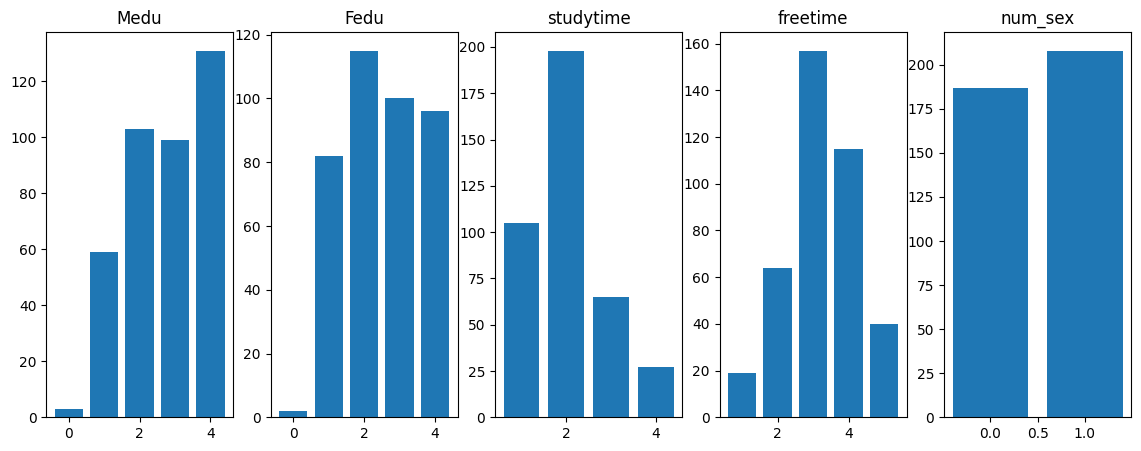

In [6]:
import matplotlib.pylab as plt


non_metric_vars = ["Medu", "Fedu", "studytime", "freetime", "num_sex"]

fig_non_metric, axs_non_metric = plt.subplots(1, 5, figsize = (14, 5))
for i, non_m_var in enumerate(non_metric_vars):
    nobs_per_cat = df_math.groupby(non_m_var).size()
    axs_non_metric[i].bar(nobs_per_cat.index, nobs_per_cat.values)
    axs_non_metric[i].set_title(non_m_var)
plt.show()

In the next cell we see the histograms of the metric variables. In a histogram, the frequencies of the expressions within defined intervals are counted. Instead of fixed interval limits, a number of internals (bins) is often specified, and the interval limits are determined accordingly over the range of all characteristic expressions. As an alternative to the absolute number of characteristic values within an interval, the empirical density values are sometimes plotted on the y-axis. In this case, the frequencies are normalized in such a way that the area below the histogram results in the value $1$. The latter is preferred especially when the empirical distribution is to be compared with density functions of theoretical distributions.

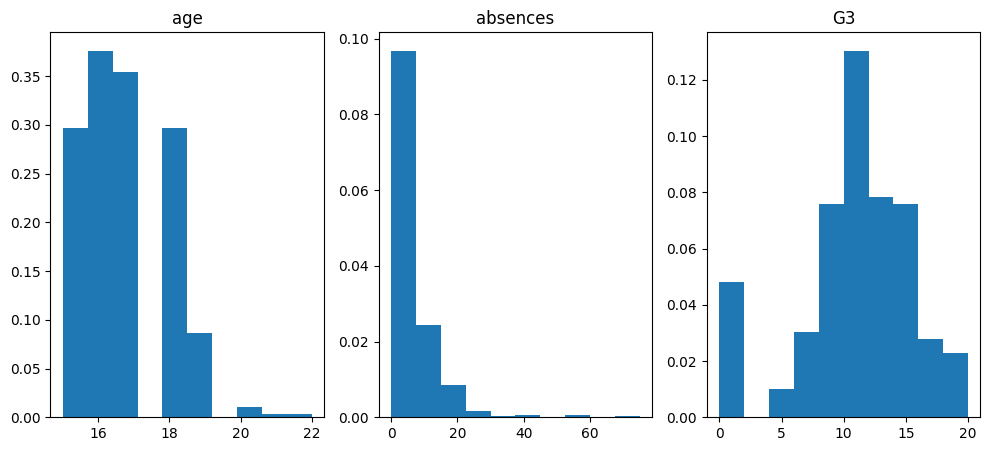

In [7]:
import matplotlib.pylab as plt


metric_vars = ["age", "absences", "G3"]

fig_metric, axs_metric = plt.subplots(1, 3, figsize = (12, 5))
for i, m_var in enumerate(metric_vars):
    axs_metric[i].hist(df_math[m_var], bins = 10, density = True)
    axs_metric[i].set_title(m_var)
plt.show()

Another way to get a graphical impression of the distributions is to use boxplots, which can be used for non-metric as well as for metric variables. Compared to barplots and histograms, boxplots are better suited to get an impression of extreme values and their accumulation. The next cell visualizes the boxplots of all features in the dataset. In the standard shown in the lower cell, the lower edge of the box corresponds to the 25\% and the upper edge of the box corresponds to the 75\% quantile, the dash in the middle symbolizes the median. The outer dashes are distances equal to $1.5$ times the interquartile range. As more extreme expressions are represented by single dots. With the help of the boxplots in the example, it is easy to see, for example, that there are significantly more isolated high values for absence than for the other characteristics.

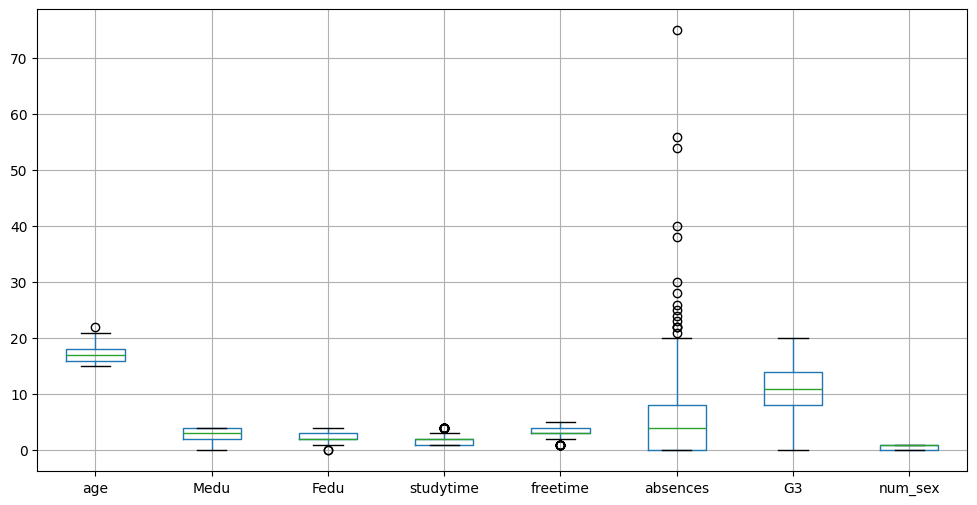

In [8]:
boxplots = df_math.boxplot(figsize = (12, 6))
plt.show()

### Representation of correlations

Very often, correlations between the characteristic values of individual variables are also of great importance for data analysis. In the first step, scatterplots can be used to visualize pairwise correlations between variables. However, these usually only provide insights in the case of continuous variables. For example, in the cell below we see a scatterplot between the absence and the final note. This seems to show a correlation. Next to it is a scatterplot between study time and free time. Since both variables are discrete in this data set, one can only see from this view which combinations of values occur, which is not very informative. As a small "workaround" for such cases, it would be possible to display the size of the points of the graph proportional to the frequency of the pairwise combinations. You can view this graph in the third plot. 

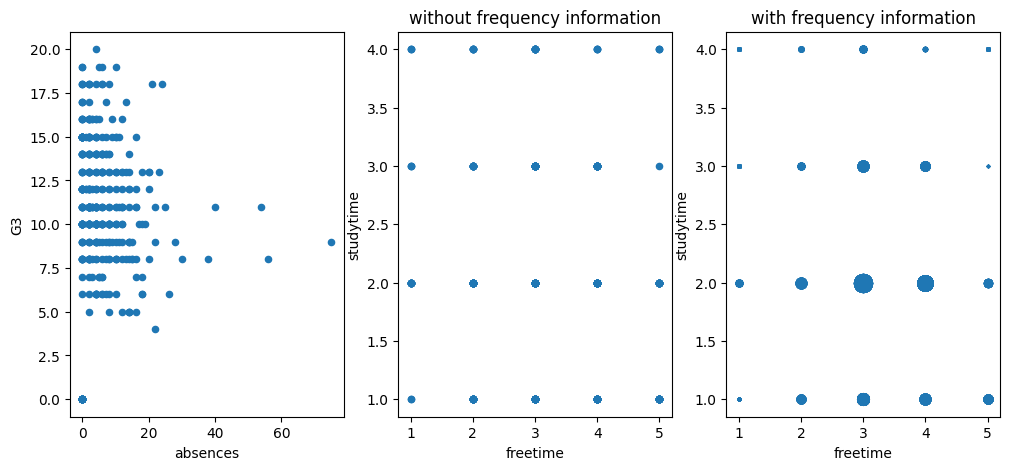

In [9]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(1, 3, figsize = (12, 5))

df_math.plot.scatter(x = "absences", y = "G3", ax = axs[0])
df_math.plot.scatter(x = "freetime", y = "studytime", ax = axs[1])

count_study_free = df_math.groupby(["freetime", "studytime"]).size()
x_levels = count_study_free.index.get_level_values(level = 0)
y_levels = count_study_free.index.get_level_values(level = 1)

for x in x_levels:
    for y in y_levels:
        axs[2].scatter(x, y, s = 2 * count_study_free.loc[x, y], color = "#1f77b4")

axs[2].set_xlabel("freetime")
axs[2].set_ylabel("studytime")

axs[1].set_title("without frequency information")
axs[2].set_title("with frequency information")

plt.show()

The possibility to visualize all pairwise dependencies of a data set exists by using heatmaps of the correlation matrix of a data set. Again, when calculating the correlations, it is important to consider the scales of the features. As long as a characteristic is at least ordinally scaled, Spearman's correlation coefficient (rank correlation) can be used. In our example, we therefore exclude the variable of gender. In a heatmap, colors and numbers make all pairwise dependencies clear relatively quickly. An example can be found in the following cell.

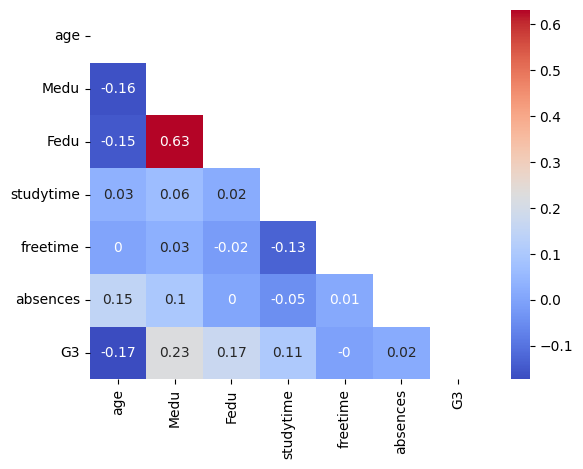

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


corr_mat = df_math.drop(["num_sex"], axis = 1).corr(method = "spearman")
mask = np.triu(np.ones_like(corr_mat))

fig, ax = plt.subplots()
sns.heatmap(corr_mat, annot= np.round(corr_mat,2), mask=mask, cmap = "coolwarm", ax = ax)
plt.show()

Finally, we consider an example of correlation analysis when we are interested in a target variable and the possible influence of individual independent characteristics that are not continuously scaled. It is convenient here to generate histograms according to the categories of the independent variables. For example, in the graph in the next cell, we again see in histogram form the final exam scores, but this time separated by individuals with high and lower learning time. Such graphs can also be generated for characteristics with multiple expressions. If the histograms of the characteristic of interest are similar for different categories of another characteristic, it can be assumed rather less of an influence of the characteristic on the target variable. The more different the distributions in dependence of the category, the stronger is potentially the influence of the characteristic.

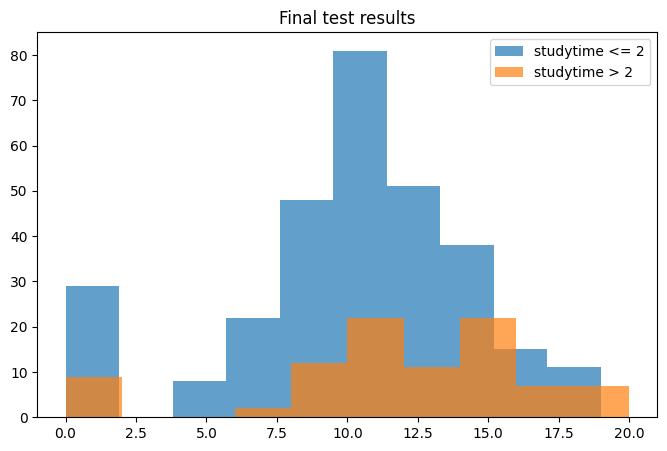

In [11]:
import matplotlib.pylab as plt


fig, ax = plt.subplots(figsize = (8, 5))

ax.hist(df_math["G3"][df_math.studytime <= 2], alpha = 0.7, label = "studytime <= 2")
ax.hist(df_math["G3"][df_math.studytime > 2], alpha = 0.7, label = "studytime > 2")
ax.set_title("Final test results")
ax.legend()
plt.show()

Here we end the excerpt from the possibilities of graphical description of data. At this point it should be noted that the generation of insightful graphs is a lifelong learning process, since good graphical visualizations strongly depend on the respective data set.

## Descriptive analysis of asset returns

As this course has an emphasis on financial markets, we are going to conduct some useful descriptive analysis for asset returns. In our example we are going to take a look et equity returns. Let us define the stock price of a company at time $t$ as $s_t$ and its relative price change between two time steps (the discrete return) as: 

$$
r_t = \frac{s_t - s_{t-1}}{s_{t-1}} =  \frac{s_t}{s_{t-1}} - 1
$$

Another way how returns are often calculated are log-returns which we denote as $z_t$. They are defined by: 

$$
z_t = \ln \left( \frac{s_t}{s_{t-1}} \right) = \ln \left(s_t\right) - \ln \left(s_{t-1}\right)
$$

For the moment, just keep in mind that discrete and log-returns are very similar if the value change of the corresponding price is not too large and the both have different mathematical properties which can be of advantage for different applications. The mathematical relationship between both return definitions is given by:

$$
z_t = \ln \left(1 + r_t\right) \\
r_t = e^{z_t} - 1
$$

Furthermore, if we want to aggregate discrete returns over $h$ periods, we can do so by calculating

$$r_t(h) = \prod_{i = t-h+1}^t \left(1 + r_i\right) - 1$$

for discrete returns, and:

$$
\begin{split}
z_t(h) & = \ln \left(1+ r_t(h)\right) = \\
& =  \ln \left(\left(1 + r_{t-h+1}\right) \cdot ... \cdot \left(1 + r_{t}\right) \right) = \\
& = \ln \left(1 + r_{t-h+1}\right) + ... +\ln \left(1 + r_{t}\right) = \\
& = z_{t-h+1} + ... + z_t = \\
& = \sum_{i = t-h+1}^t z_i
\end{split}
$$

for log-returns. Asset returns are essential to analyze the value (and its development) of assets such as stock prices. The analysis of returns instead of the asset price itself is done due to reasons of comparability of assets with different price levels and a statistical concept called (weak) stationarity. Without going into details, this characteristic makes sure that conclusions which are drawn with a certain data sample from a time period can be used for other time periods. For instance, if we estimate the expected return for Apple's stock price we can use data from the last two years and use this estimate for the next twelve month. 

In the cells below, we examine daily and monthly returns over the past five years for ten companies from the US and Germany. The descriptive statistics of daily data reveal a few common characteristics for daily returns. The average return of every company is close to zero and the excess kurtosis is greater than zero for all companies which indicates that returns distributions have heavy tails. The latter points to leptocurtic probability distributions that have higher probability masses in the tails of the distribution than a normal distribution. As a consequence, more extreme events occur more often than under a process sampled from a normal distribution.

In [12]:
import pandas as pd
import numpy as np

# import data
ticker_data = pd.read_csv("../data/ten_stocks_US_GER.csv")
ticker_data = ticker_data.assign(date = pd.to_datetime(ticker_data["Date"])).set_index("date").drop(["Date"], axis = 1)

# determine daily and monthly returns
discrete_daily_returns = ticker_data.pct_change(fill_method = None).iloc[1:, :]
log_daily_returns = discrete_daily_returns.add(1.).apply(np.log)
log_monthly_returns = log_daily_returns.resample("ME").sum()
discrete_monthly_returns = log_monthly_returns.apply(np.exp).subtract(1.)

# daily descriptive statistics
daily_descriptive_statistics = discrete_daily_returns.describe(percentiles=[0.05, 0.95])
daily_descriptive_statistics.loc["skewness", :] = discrete_daily_returns.skew()
daily_descriptive_statistics.loc["ex. kurtosis", :] = discrete_daily_returns.kurtosis()
daily_descriptive_statistics

,AAPL,AMZN,BMW.DE,DBK.DE,F,MCD,MS,MUV2.DE,SAP.DE,SIE.DE
count,1223.000000,1223.000000,1257.000000,1257.000000,1223.000000,1223.000000,1223.000000,1257.000000,1257.000000,1257.000000
mean,0.001554,0.000821,0.000525,0.000939,0.000763,0.000480,0.001205,0.000939,0.000700,0.000810
std,0.019954,0.022413,0.019412,0.025758,0.028031,0.014867,0.021985,0.018001,0.017260,0.019398
min,-0.128647,-0.140494,-0.129714,-0.184360,-0.183614,-0.158754,-0.156000,-0.177419,-0.219375,-0.126960
5%,-0.029969,-0.032922,-0.029830,-0.037917,-0.039149,-0.018117,-0.030124,-0.023710,-0.025986,-0.029105
50%,0.001511,0.000711,0.000550,0.001120,0.000000,0.000548,0.001289,0.000796,0.000443,0.000600
95%,0.030410,0.035738,0.028988,0.039052,0.044576,0.019653,0.030648,0.023560,0.024614,0.028594
max,0.119808,0.135359,0.144724,0.128993,0.234414,0.181254,0.197701,0.201749,0.102344,0.115594
skewness,0.110834,0.065964,-0.218681,-0.383373,0.158507,0.446955,0.532250,0.653855,-1.488945,0.027285
ex. kurtosis,5.353408,4.338751,7.784073,6.317493,7.184865,33.950452,14.880085,24.438809,23.912405,5.327983


Taking a look at the boxplots below visualizes findings from the descriptive statistics. Keep in mind that many observations are beyond the whiskers whose length is $1.5$ times the inter quartile range. This emphasizes the frequent occurrence of rather extreme realizations.

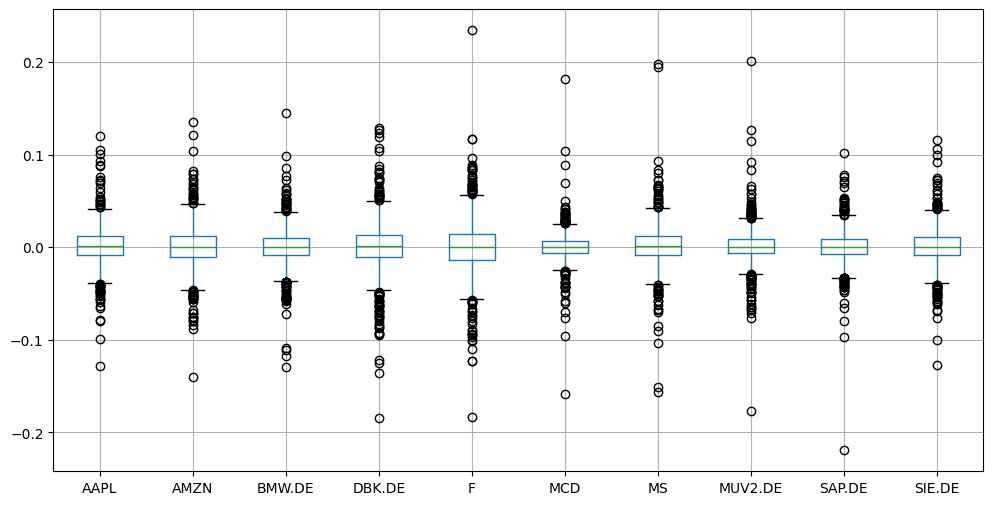

In [13]:
discrete_daily_returns.boxplot(figsize = (12, 6))
plt.show()

Another important characteristic of equity returns is their positive correlation. This is why we examine the heatmap of correlations below. Overall correlations are positive for each pair and within countries the highest correlation values can be measures. Note that we exhibit Spearman correlation which is a rank based correlation measure and more robust to outliers and non-linear relationships. 

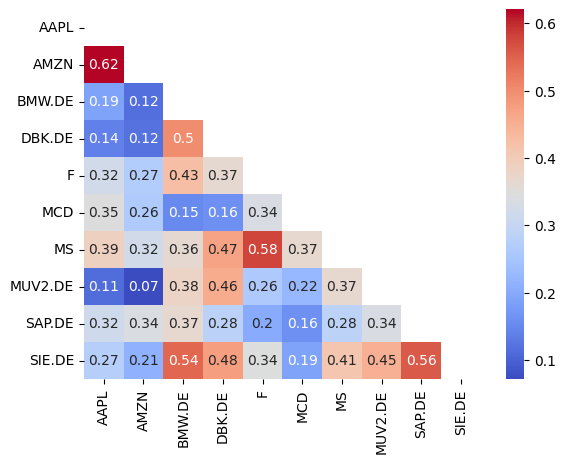

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


corr_mat_daily = discrete_daily_returns.corr(method = "spearman")
mask = np.triu(np.ones_like(corr_mat_daily))

fig, ax = plt.subplots()
sns.heatmap(corr_mat_daily, annot= np.round(corr_mat_daily,2), mask=mask, cmap = "coolwarm", ax = ax)
plt.show()

Revisiting these statistics and visualizations for monthly data reveals some differences. Taking a look at the descriptive statistics below, we observe estimated mean values which are different from zero and mostly positive. Excess kurtosis values are smaller and even negative for Apple. This indicates that less frequent returns which measure the price development over a longer period are less extreme.

In [15]:
monthly_descriptive_statistics = discrete_monthly_returns.describe(percentiles=[0.05, 0.95])
monthly_descriptive_statistics.loc["skewness", :] = discrete_monthly_returns.skew()
monthly_descriptive_statistics.loc["ex. kurtosis", :] = discrete_monthly_returns.kurtosis()
monthly_descriptive_statistics

,AAPL,AMZN,BMW.DE,DBK.DE,F,MCD,MS,MUV2.DE,SAP.DE,SIE.DE
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.030781,0.015473,0.010403,0.017266,0.015652,0.008991,0.023417,0.018481,0.014537,0.016161
std,0.082299,0.090750,0.084699,0.097734,0.128367,0.056462,0.088850,0.068227,0.078415,0.082024
min,-0.122273,-0.237525,-0.200492,-0.242417,-0.306034,-0.148427,-0.244948,-0.201994,-0.310862,-0.207040
5%,-0.098189,-0.098726,-0.091959,-0.165660,-0.202735,-0.082886,-0.122254,-0.103848,-0.083006,-0.103884
50%,0.032097,0.023555,-0.008130,0.022203,0.026490,-0.002030,0.033145,0.025467,0.018882,0.007388
95%,0.147386,0.155482,0.135132,0.179583,0.206215,0.095953,0.128253,0.117102,0.141962,0.132908
max,0.216570,0.268900,0.244717,0.263406,0.333998,0.181676,0.276871,0.163347,0.161079,0.232394
skewness,-0.005709,0.290685,0.401919,-0.172014,-0.052618,0.340224,-0.236518,-0.616868,-0.985978,0.118767
ex. kurtosis,-0.863567,0.977825,0.561502,0.809262,0.319879,1.157348,0.931355,0.996696,3.677885,1.041643


The boxplots confirm this observation as only a few observations are beyond the whiskers. Note that average returns being mostly positive is very likely related to the rather booming environment on equity markets over the past five years. 

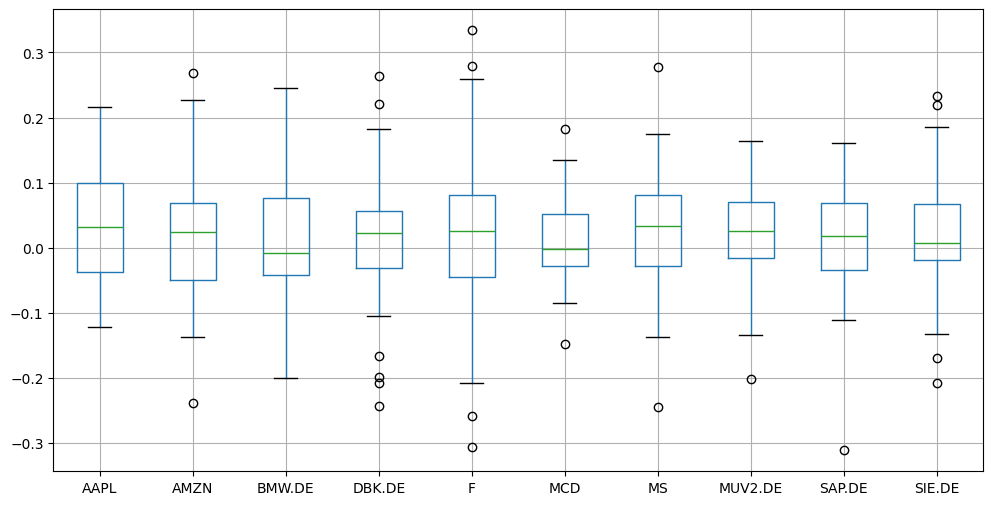

In [16]:
discrete_monthly_returns.boxplot(figsize = (12, 6))
plt.show()

Correlation between monthly data remains at high levels. The only difference is that monthly correlations are also high between countries, e.g., Apple - Siemens or Apple - SAP.

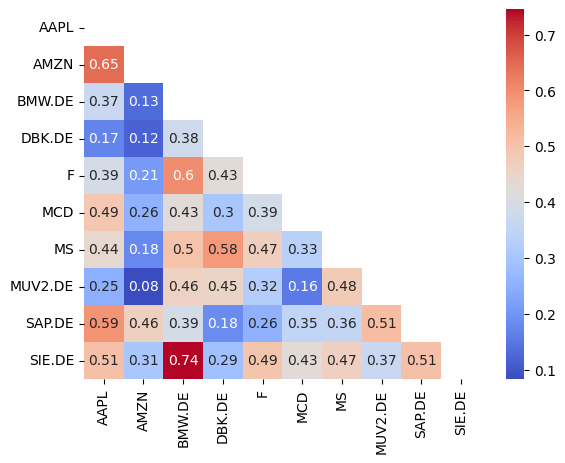

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


corr_mat_monthly = discrete_monthly_returns.corr(method = "spearman")
mask = np.triu(np.ones_like(corr_mat_monthly))

fig, ax = plt.subplots()
sns.heatmap(corr_mat_monthly, annot= np.round(corr_mat_monthly,2), mask=mask, cmap = "coolwarm", ax = ax)
plt.show()







When analyzing financial market data, we often collect data over a series of time steps with sequentiel ordering - time series data. Questions often arise which relate to the development over time which is why descriptive analyes should include the time dimension as well. To examine the behavior for certain metrics such as the arithmetic mean or the empirical standard deviation over time, we may use the recent history of observations and update these estimates as soon as new data points are added. This can be achieved by means of a so called rolling window which always uses the past $n_w$ data points to determine the metric of interest. Alternatively, one can use an exponentially weighted metric which gives more weight to more recent observations. For instance, estimation of the expected value $x$ at $t$ using the rolling window approach would be done by:

$$
\hat{\mu}_t = \frac{1}{n_w} \sum_{t' = t - n_w}^{t} x_{t'}
$$

In it's easiest version, the exponentially weighted estimation uses a weighting parameter $\alpha$ for recent observations and a recursive definition. For instance the expected value can be estimated by:

$$
\hat{\mu}_1 = x_1 \\
\hat{\mu}_t = \left(1 - \alpha\right) \hat{\mu}_{t-1} + \alpha x_t
$$

$0 < \alpha \leq 1 $ is set by the user and needs to be specified by the user. The higher its value, the more sensible the estimate reacts towards recent observations. This idea can also be applied to the estimation of the variance or correlation.


In [18]:
import pandas as pd
import numpy as np

# import data
ticker_data = pd.read_csv("../data/spy_dax.csv")
ticker_data = ticker_data.assign(date = pd.to_datetime(ticker_data["Date"])).set_index("date").drop(["Date"], axis = 1)

# determine daily and monthly returns
discrete_daily_returns = ticker_data.pct_change(fill_method = None).iloc[1:, :]
log_daily_returns = discrete_daily_returns.add(1.).apply(np.log)
log_monthly_returns = log_daily_returns.resample("ME").sum()
discrete_monthly_returns = log_monthly_returns.apply(np.exp).subtract(1.)

Below we observe the time-varying estimation for the monthly mean ($\alpha = 0.2$) of an ETF for the S\&P 500 and the DAX index. We observe a cyclical pattern for both regions

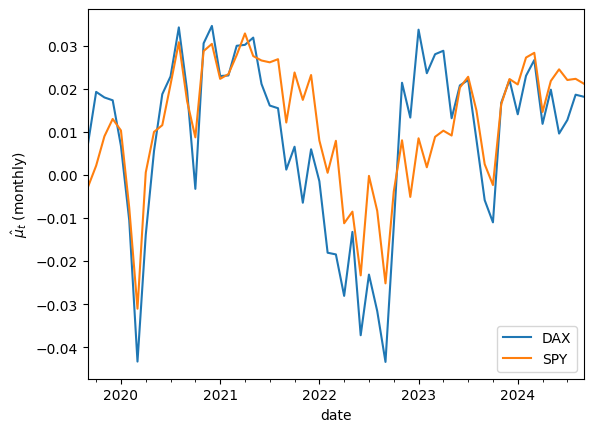

In [19]:
discrete_monthly_returns.ewm(alpha = 0.2, adjust = False).mean().plot(ylabel = r"$\hat{\mu}_t$ (monthly)")
plt.show()

More persistent is the time-varying nature of variance and standard deviation of asset returns. The graph below shows two periods with higher volatilities for both ETFs in the past five years. 

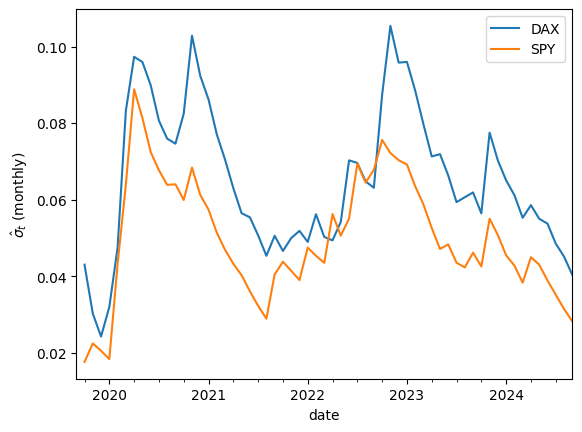

In [20]:
discrete_monthly_returns.ewm(alpha = 0.2, adjust = False).std().plot(ylabel = r"$\hat{\sigma}_t$ (monthly)")
plt.show()

The observations from above indicate dependencies over time. This is often examined by auto-covariance and auto-correlation, respectively. Autocorrelation describes the linear relationship of successive values. The auto-covariance of a variable can be estimated by means of:

$$
\hat{\gamma}(h) = \frac{1}{T} \sum_{t = 1}^{T-h} \left(x_t - \bar{x}\right)\left(x_{t-h}  - \bar{x}\right)
$$

where $h$ describes the time interval of successive observations and $T$ the number of observations over time. If you compare this formula with the estimator of the covariance of two variables, you will see that the auto-covariance determines the correlation with the own values at $h$ time intervals. The normalized form of the auto-covariance is the auto-correlation, which is given by:

$$
\hat{\rho}(h) = \frac{\hat{\gamma}(h)}{\hat{\gamma}(0)}
$$

This value is in the interval $[-1, 1]$ and can be interpreted in an analogous way to the Bravais-Pearson correlation. If a non-zero auto-correlation is measured, it is useful to model current data points using past data. 

In the cells below, we observe the return series and absolute return series for the S\&P 500 and DAX ETF together with the estimated autocorrealations. We observe small auto-correlation between certain day lags for returns and larger values for absolute returns. The implication is that today's price developments have little predictive power for future movements, however, volatile and more calm times seem to persist, once they started. 

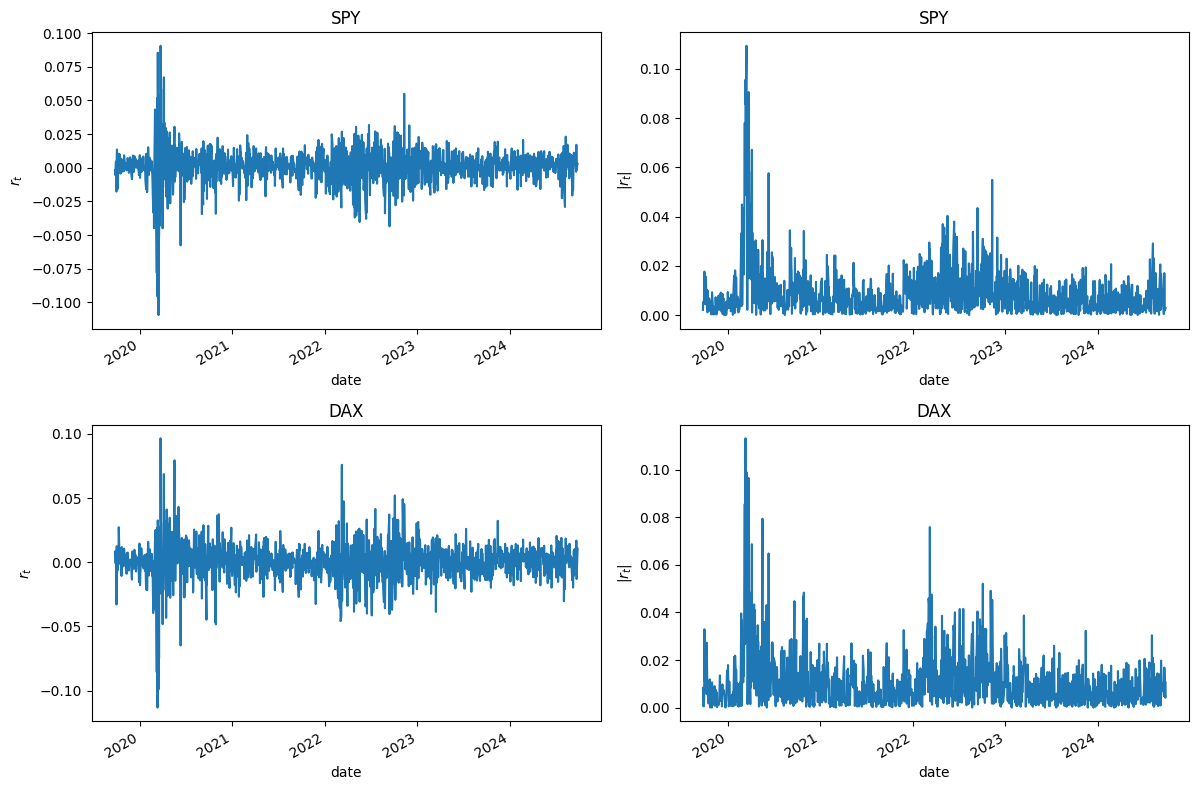

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


# import data
ticker_data = pd.read_csv("../data/spy_dax.csv")
ticker_data = ticker_data.assign(date = pd.to_datetime(ticker_data["Date"])).set_index("date").drop(["Date"], axis = 1)

# determine daily and monthly returns
discrete_daily_returns = ticker_data.pct_change(fill_method = None).iloc[1:, :]
log_daily_returns = discrete_daily_returns.add(1.).apply(np.log)
log_monthly_returns = log_daily_returns.resample("ME").sum()
discrete_monthly_returns = log_monthly_returns.apply(np.exp).subtract(1.)

fig, axs = plt.subplots(2, 2, figsize = (12, 8))
discrete_daily_returns["SPY"].plot(ax = axs[0, 0], title = "SPY", xlabel = "date", ylabel = r"$r_t$")
discrete_daily_returns["SPY"].abs().plot(ax = axs[0, 1], title = "SPY", xlabel = "date", ylabel = r"$|r_t|$")
discrete_daily_returns["DAX"].plot(ax = axs[1, 0], title = "DAX", xlabel = "date", ylabel = r"$r_t$")
discrete_daily_returns["DAX"].abs().plot(ax = axs[1, 1], title = "DAX", xlabel = "date", ylabel = r"$|r_t|$")
fig.tight_layout()
plt.show()

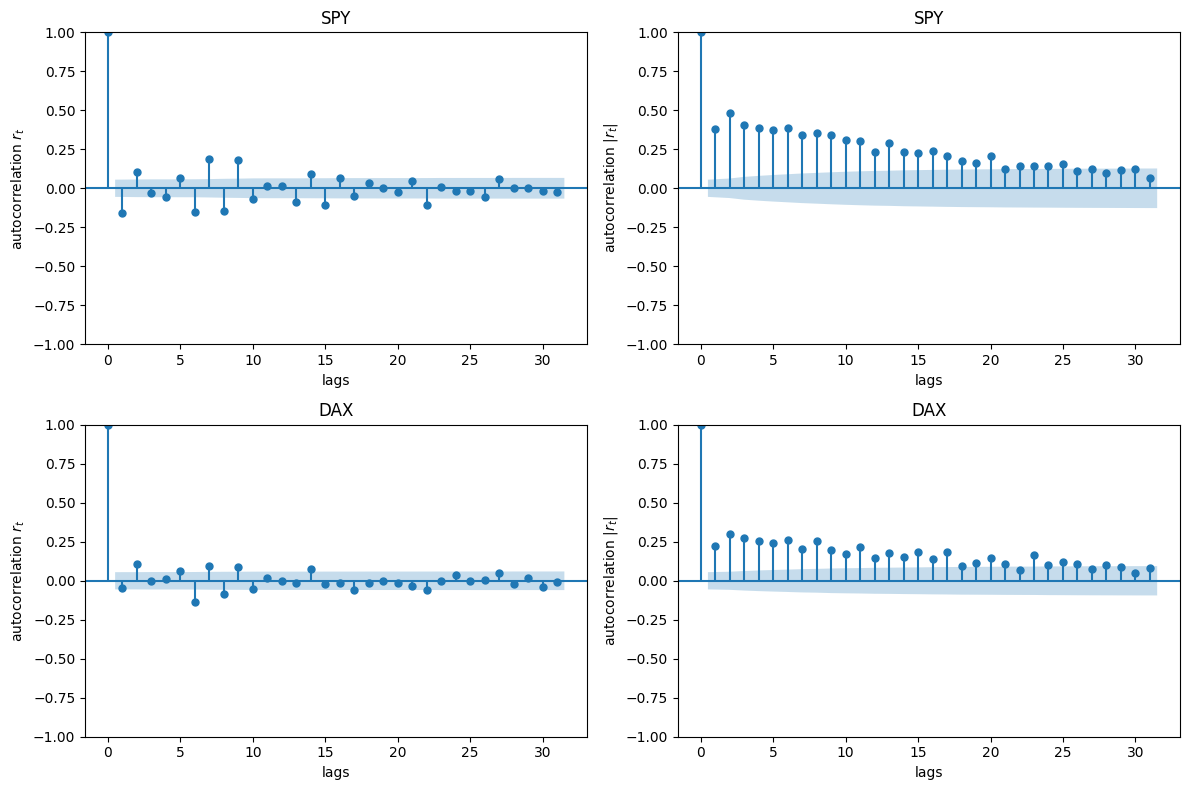

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(2, 2, figsize = (12, 8))
for i, name in enumerate(["SPY", "DAX"]):
    plot_acf(discrete_daily_returns[name].interpolate().values, ax = axs[i, 0])
    plot_acf(discrete_daily_returns[name].interpolate().abs().values, ax = axs[i, 1])  
    axs[i, 0].set_title(f"{name}")
    axs[i, 0].set_xlabel("lags")
    axs[i, 0].set_ylabel(r"autocorrelation $r_t$")
    axs[i, 1].set_title(f"{name}")
    axs[i, 1].set_xlabel("lags")
    axs[i, 1].set_ylabel(f"autocorrelation $|r_t|$")


fig.tight_layout()
plt.show()

## Data processing

One last aspect which is not directly linked to descriptive analyses, however, is usually done after it, is processing of data before we utilize it for further model based analyses. Some data points need to be prepared in order to train models of data analysis with these data. The most relevant aspects here are the handling of categorical data and the normalization of quantitative characteristic values. For nominal and ordinal characteristics, it can happen that these are passed in the data set as non-numerical values, e.g. "male", "female" or "bad", "neutral", "good". For ordinal characteristics, it is useful to assign numbers to the categories according to the oridinal order, e.g. "bad" -> 1, "neutral" -> 2, "good" -> 3. By the way, it is not mandatory that the numbers 1,2,3 are used, as long as a reasonable logic is used for the order, the numbers can be chosen arbitrarily. If a characteristic is nominally scaled, a one-hot encoding is often used. The respective applicable category is marked as "hot" by a 1, while the remaining categories are 0's. More precisely, the one-hot encoding must generate as many new variables as there are categories. For example, with two categories, the first category would be represented by the vector $\begin{pmatrix} 1 & 0 \end{pmatrix}^T$ and the second category by the vector $\begin{pmatrix} 0 & 1 \end{pmatrix}^T$, for example, if there are three categories, the first category would be represented by the vector $\begin{pmatrix} 1 & 0 & 0 \end{pmatrix}^T$, the second category by the vector $\begin{pmatrix} 0 & 1 & 0 \end{pmatrix}^T$, and the third category by the vector $\begin{pmatrix} 0 & 0 & 1 \end{pmatrix}^T$. This type of coding can also be used for ordinal characteristics, but the ordinal information is initially lost. Alternatively, dummy coding is used in statistics, where one category is set as the standard and the remaining characteristics are coded by $K-1$ 1-0 variables. 

For numerical characteristics, it can often be useful and sometimes necessary to bring the values to a comparable range of values. This facilitates comparability of influence strength during analysis and is necessary for some algorithms to prevent numerical problems when training the models. For this purpose, different types of standardization can be chosen. Two common options are standardization:

$$
z = \frac{x - \bar{x}}{s}
$$

and the min-max scaling:


$$
z = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

In the cells below, we generate a sample dataset with the characteristics "gender", "assessment" and "score". The *info* method of the pandas DataFrame shows us that the first two variables are categorical features, contained in text format in the dataset. This is signaled by pandas by the type "object". The type "float64" describes a floating point number, which corresponds to a comma separator, so we can assume a numeric value. In the first step, the characteristic "gender" is analyzed for the number of different expressions and then one-hot-encoded. Subsequently, numbers are assigned to the categories of the variable "assessment" in ascending order. Finally, the variable "score" is standardized and min-max scaled. The effect of the different scaling can best be visualized by comparing the histograms or boxplots of these variables.

In [23]:
import pandas as pd
import numpy as np
import random

gender = ["male"] * 250 + ["female"] * 250
random.shuffle(gender)
assessment = ["bad"] * 150 + ["neural"] * 200 + ["good"] * 150
random.shuffle(assessment)
numerical = np.random.normal(size = 500, loc = 2, scale = 2)

df = pd.DataFrame({"gender": gender, "assessment": assessment, "score": numerical})
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      500 non-null    object 
 1   assessment  500 non-null    object 
 2   score       500 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.8+ KB
None


,gender,assessment,score
0,female,neural,2.460972
1,female,neural,1.271612
2,female,bad,-1.790507
3,male,bad,1.304410
4,female,good,3.088083


In [24]:
from sklearn.preprocessing import OneHotEncoder


one_hot_encoder = OneHotEncoder()

print("The variable gender has the following unique values:")
print(df.gender.unique())

df.loc[:, ["female", "male"]] = one_hot_encoder.fit_transform(df.gender.values.reshape(-1, 1)).toarray()
df.drop(["gender"], axis = 1, inplace = True)
df.head()

The variable gender has the following unique values:
['female' 'male']


,assessment,score,female,male
0,neural,2.460972,1.0,0.0
1,neural,1.271612,1.0,0.0
2,bad,-1.790507,1.0,0.0
3,bad,1.304410,0.0,1.0
4,good,3.088083,1.0,0.0


In [25]:
print("The variable assessment has the following unique values:")
print(df.assessment.unique())

df.replace(to_replace = ["bad", "neural", "good"], value = ['1', '2', '3'], inplace = True)
df["assessment"] = df["assessment"].astype(int)
df.head()

The variable assessment has the following unique values:
['neural' 'bad' 'good']


,assessment,score,female,male
0,2,2.460972,1.0,0.0
1,2,1.271612,1.0,0.0
2,1,-1.790507,1.0,0.0
3,1,1.304410,0.0,1.0
4,3,3.088083,1.0,0.0


In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

df.loc[:, "standard_score"] = standard_scaler.fit_transform(df.score.values.reshape(-1, 1))
df.loc[:, "minmax_score"] = minmax_scaler.fit_transform(df.score.values.reshape(-1, 1))
df.head()

,assessment,score,female,male,standard_score,minmax_score
0,2,2.460972,1.0,0.0,0.219363,0.525967
1,2,1.271612,1.0,0.0,-0.353899,0.424971
2,1,-1.790507,1.0,0.0,-1.829815,0.164946
3,1,1.304410,0.0,1.0,-0.338090,0.427756
4,3,3.088083,1.0,0.0,0.521626,0.579220


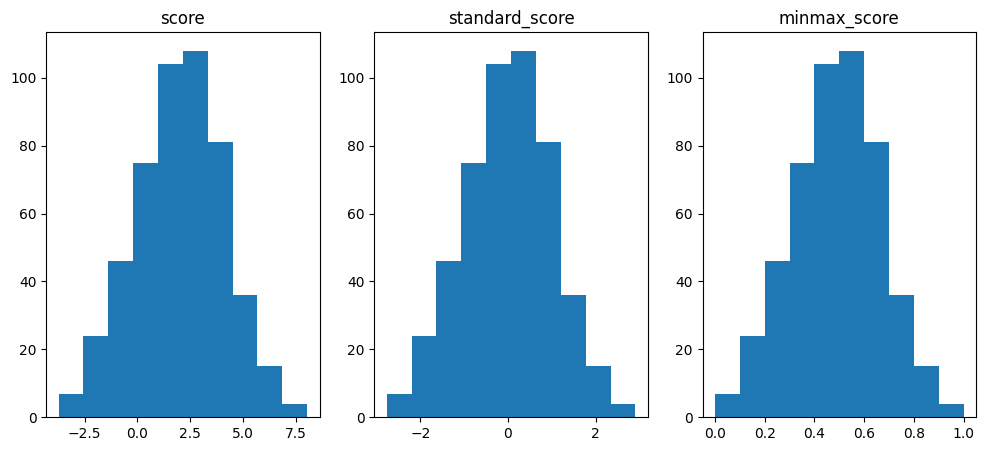

In [27]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(1, 3, figsize = (12, 5))
axs[0].hist(df.score)
axs[1].hist(df.standard_score)
axs[2].hist(df.minmax_score)
axs[0].set_title("score")
axs[1].set_title("standard_score")
axs[2].set_title("minmax_score")
plt.show()

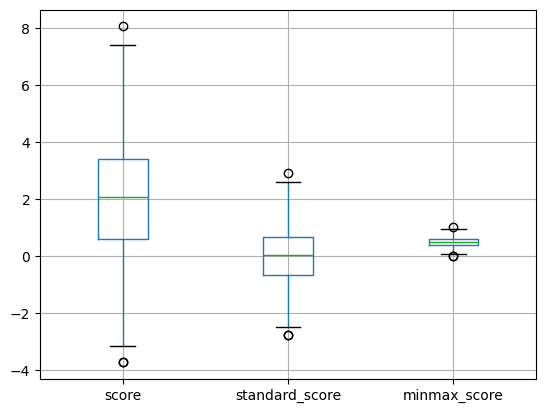

In [28]:
df.loc[:, ["score", "standard_score", "minmax_score"]].boxplot()
plt.show()